In [11]:
import numpy as np
import pandas as pd
%matplotlib inline
import warnings
warnings.simplefilter(action = "ignore", category  = FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns
import os
if os.name == "nt" :
    font_family = "Malgun Gothic"
else :
    font_family = "AppleGothic"

sns.set(font = font_family, rc = {"axes.unicode_minus" : False})

In [12]:
data = sns.load_dataset("tips")
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [13]:
print(data["tip"].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

print("\n")
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(data["tip"].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

0.05    1.4400
0.25    2.0000
0.50    2.9000
0.75    3.5625
0.95    5.1955
Name: tip, dtype: float64


     5.0%  25.0%  50.0%   75.0%   95.0%
tip  1.44    2.0    2.9  3.5625  5.1955


Text(0, 0.5, '달러($)')

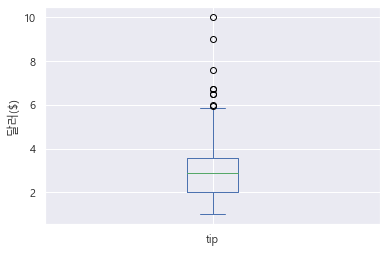

In [15]:
ax = (data["tip"]).plot.box()
ax.set_ylabel("달러($)")

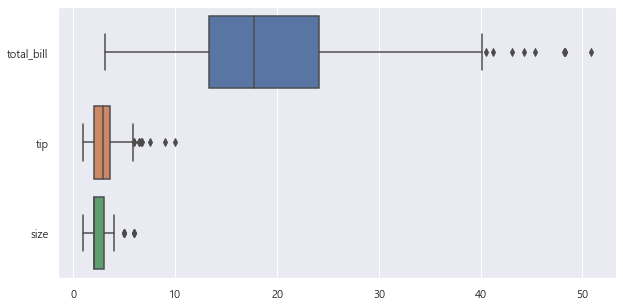

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = data, orient = "h")
plt.show()

In [18]:
tips_sum_day = data.groupby("day").tip.sum()
tips_sum_day

day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

<BarContainer object of 4 artists>

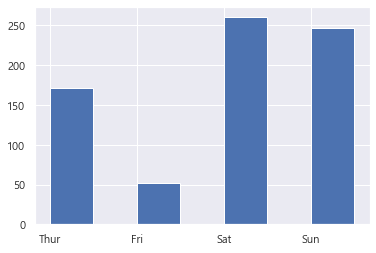

In [23]:
label = ["Thur", "Fri", "Sat", "Sun"]
plt.bar(label, tips_sum_day, width = 0.5, align = "edge")

<AxesSubplot:xlabel='sex', ylabel='tip'>

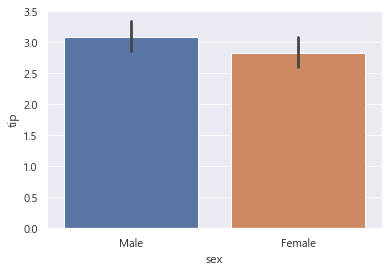

In [24]:
sns.barplot(data = data, x = "sex", y = "tip")

<AxesSubplot:xlabel='sex', ylabel='tip'>

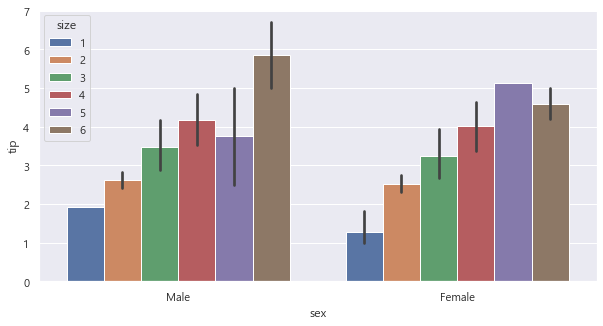

In [25]:
plt.figure(figsize = (10, 5))
sns.barplot(data = data, x = "sex", y = "tip", hue = "size")

In [27]:
bin_total = pd.cut(data["total_bill"], 8)
bin_total.value_counts()

(15.005, 20.972]    81
(9.038, 15.005]     68
(20.972, 26.94]     38
(26.94, 32.908]     24
(3.022, 9.038]      12
(32.908, 38.875]    10
(38.875, 44.842]     6
(44.842, 50.81]      5
Name: total_bill, dtype: int64

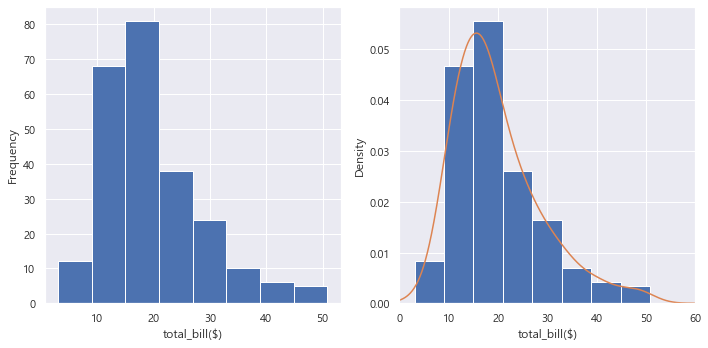

In [29]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
ax1 = plt.subplot(1, 2, 1)
ax1 = (data["total_bill"]).plot.hist(bins = 8)
ax1.set_xlabel("total_bill($)");

plt.subplot(1, 2, 2)
ax2 = data["total_bill"].plot.hist(density = True, xlim = [0, 60], bins = 8)
data["total_bill"].plot.density(ax = ax2);
ax2.set_xlabel("total_bill($)");

plt.tight_layout()
plt.show()